# Part 0 : Import data cleaning, separation of training and validation data set

In [50]:
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score 
import numpy as np
from pylab import plt
from pylab import subplot
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [51]:
counter_strike_data = pd.read_csv("CSGOComplete.csv")

In [52]:
#Data Cleaning
counter_strike_data  = counter_strike_data.drop(['Day','Month','Year','Date'] , axis = 1)
x_counter_strike_data = counter_strike_data.drop(labels = ['Result'],axis = 1)
y_counter_strike_data = counter_strike_data[['Result']]

In [53]:
y_counter_strike_data = y_counter_strike_data['Result']
len_yResult = len(y_counter_strike_data)
for i in range(0, len_yResult):
    if(y_counter_strike_data[i] == 'Win'):
        y_counter_strike_data[i] = '1'
    elif(y_counter_strike_data[i] == 'Lost'):
        y_counter_strike_data[i] = '0'
    elif(y_counter_strike_data[i]== 'Tie'):
        y_counter_strike_data[i] = '2'

c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [54]:
colNames = x_counter_strike_data.columns

for i in range(0, len(colNames)):
    if(colNames[i]!="Map"):
        x_counter_strike_data[colNames[i]] = scaler.fit_transform(x_counter_strike_data[colNames[i]]
                                                             .values.reshape(-1,1))

In [55]:
mapColumn = x_counter_strike_data['Map']
mapColumnLen = len(x_counter_strike_data['Map'])

for i in range(0,mapColumnLen):
    if(mapColumn[i] == 'Mirage'):
        mapColumn[i] = 0
    elif(mapColumn[i] == 'Dust II'):
        mapColumn[i] = 1
    elif(mapColumn[i] == 'Cache'):
        mapColumn[i] = 2
    elif(mapColumn[i] == 'Overpass'):
        mapColumn[i] = 3
    elif(mapColumn[i] == 'Cobblestone'):
        mapColumn[i] = 4
    elif(mapColumn[i] == 'Inferno'):
        mapColumn[i] = 5
    elif(mapColumn[i] == 'Austria'):
        mapColumn[i] = 6
    elif(mapColumn[i] == 'Canals'):
        mapColumn[i] = 7
    elif(mapColumn[i] == 'Nuke'):
        mapColumn[i] = 8
    elif(mapColumn[i] == 'Italy'):
        mapColumn[i] = 9

c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while 

In [56]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x_counter_strike_data, y_counter_strike_data, test_size=0.3,
                                                   random_state=1)

# KNN Algorithm

# Part 1(i) : KNN Algorithm - Training Data

In [57]:
metrics_list = ['euclidean','manhattan','chebyshev']
algorithm_list = ['ball_tree','kd_tree']
number_of_neighbors = [2,3,4,5,6,7,8,9]

final_metrics = []
final_algo_list = []
final_neighbors = []
final_accuracyList = []


step = 0
for i in range (0,len(metrics_list)):
    for j in range (0,len(algorithm_list)):
        for k in range (0,len(number_of_neighbors)):
            neigh = KNeighborsClassifier(metric=metrics_list[i],
                                         algorithm  = algorithm_list[j],
                                         n_neighbors=number_of_neighbors[k]
                                         )
            neigh.fit(X_Train, Y_Train)
            predicted_classes = neigh.predict(X_Train)
            accuracyValue = accuracy_score(Y_Train,predicted_classes)
            
            final_metrics.append(metrics_list[i])
            final_algo_list.append(algorithm_list[j])
            final_neighbors.append(number_of_neighbors[k])
            
            final_accuracyList.append(accuracyValue)
            step = step+1
            print("Done:",(step),"/",(len(algorithm_list) * len(metrics_list) * len(number_of_neighbors) ) )

Done: 1 / 48
Done: 2 / 48
Done: 3 / 48
Done: 4 / 48
Done: 5 / 48
Done: 6 / 48
Done: 7 / 48
Done: 8 / 48
Done: 9 / 48
Done: 10 / 48
Done: 11 / 48
Done: 12 / 48
Done: 13 / 48
Done: 14 / 48
Done: 15 / 48
Done: 16 / 48
Done: 17 / 48
Done: 18 / 48
Done: 19 / 48
Done: 20 / 48
Done: 21 / 48
Done: 22 / 48
Done: 23 / 48
Done: 24 / 48
Done: 25 / 48
Done: 26 / 48
Done: 27 / 48
Done: 28 / 48
Done: 29 / 48
Done: 30 / 48
Done: 31 / 48
Done: 32 / 48
Done: 33 / 48
Done: 34 / 48
Done: 35 / 48
Done: 36 / 48
Done: 37 / 48
Done: 38 / 48
Done: 39 / 48
Done: 40 / 48
Done: 41 / 48
Done: 42 / 48
Done: 43 / 48
Done: 44 / 48
Done: 45 / 48
Done: 46 / 48
Done: 47 / 48
Done: 48 / 48


# Part 1(ii) : KNN Algorithm - Training Data - Plot

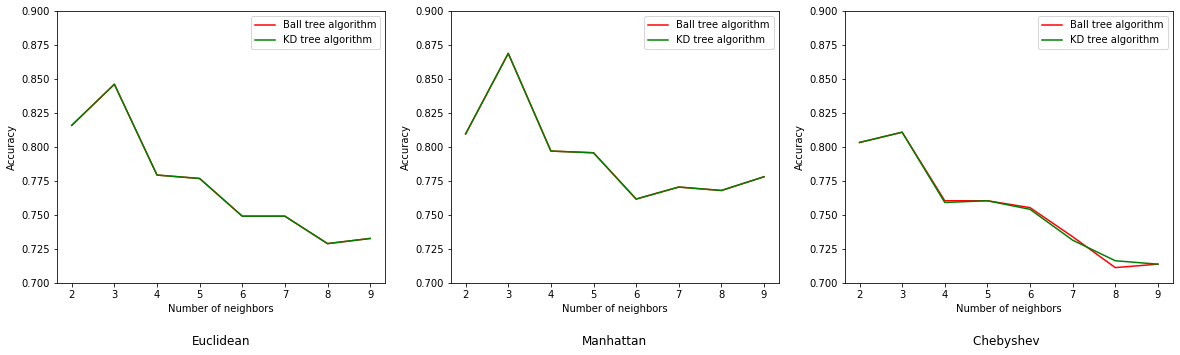

In [58]:
#Identity graph
steps = np.arange(2,10,1)


plt.figure(figsize=(20,5))
subplot(1,3,1)
plt.plot(steps, final_accuracyList[0:8], color='red', label='Ball tree algorithm')
plt.plot(steps, final_accuracyList[8:16], color='green', label='KD tree algorithm')
plt.ylim(0.70,0.9,0.01)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Euclidean', y=-0.25)

subplot(1,3,2)
plt.plot(steps, final_accuracyList[16:24], color='red', label='Ball tree algorithm')
plt.plot(steps, final_accuracyList[24:32], color='green', label='KD tree algorithm')
plt.ylim(0.70,0.9,0.01)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Manhattan', y=-0.25)

subplot(1,3,3)
plt.plot(steps, final_accuracyList[32:40], color='red', label='Ball tree algorithm')
plt.plot(steps, final_accuracyList[40:48], color='green', label='KD tree algorithm')
plt.ylim(0.70,0.9,0.01)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Chebyshev ', y=-0.25)


plt.show()

# Part 2(i) -  KNN Algorithm - Validation Data

In [59]:
metrics_list = ['euclidean','manhattan','chebyshev']
algorithm_list = ['ball_tree','kd_tree']
number_of_neighbors = [2,3,4,5,6,7,8,9]

final_metrics = []
final_algo_list = []
final_neighbors = []
final_accuracyList = []


step = 0
for i in range (0,len(metrics_list)):
    for j in range (0,len(algorithm_list)):
        for k in range (0,len(number_of_neighbors)):
            neigh = KNeighborsClassifier(metric=metrics_list[i],
                                         algorithm  = algorithm_list[j],
                                         n_neighbors=number_of_neighbors[k]
                                         )
            neigh.fit(X_Train, Y_Train)
            predicted_classes = neigh.predict(X_Test)
            accuracyValue = accuracy_score(Y_Test,predicted_classes)
            
            final_metrics.append(metrics_list[i])
            final_algo_list.append(algorithm_list[j])
            final_neighbors.append(number_of_neighbors[k])
            
            final_accuracyList.append(accuracyValue)
            step = step+1
            print("Done:",(step),"/",(len(algorithm_list) * len(metrics_list) * len(number_of_neighbors) ) )

Done: 1 / 48
Done: 2 / 48
Done: 3 / 48
Done: 4 / 48
Done: 5 / 48
Done: 6 / 48
Done: 7 / 48
Done: 8 / 48
Done: 9 / 48
Done: 10 / 48
Done: 11 / 48
Done: 12 / 48
Done: 13 / 48
Done: 14 / 48
Done: 15 / 48
Done: 16 / 48
Done: 17 / 48
Done: 18 / 48
Done: 19 / 48
Done: 20 / 48
Done: 21 / 48
Done: 22 / 48
Done: 23 / 48
Done: 24 / 48
Done: 25 / 48
Done: 26 / 48
Done: 27 / 48
Done: 28 / 48
Done: 29 / 48
Done: 30 / 48
Done: 31 / 48
Done: 32 / 48
Done: 33 / 48
Done: 34 / 48
Done: 35 / 48
Done: 36 / 48
Done: 37 / 48
Done: 38 / 48
Done: 39 / 48
Done: 40 / 48
Done: 41 / 48
Done: 42 / 48
Done: 43 / 48
Done: 44 / 48
Done: 45 / 48
Done: 46 / 48
Done: 47 / 48
Done: 48 / 48


# Part 2(ii) -  KNN Algorithm - Validation Data - Plot

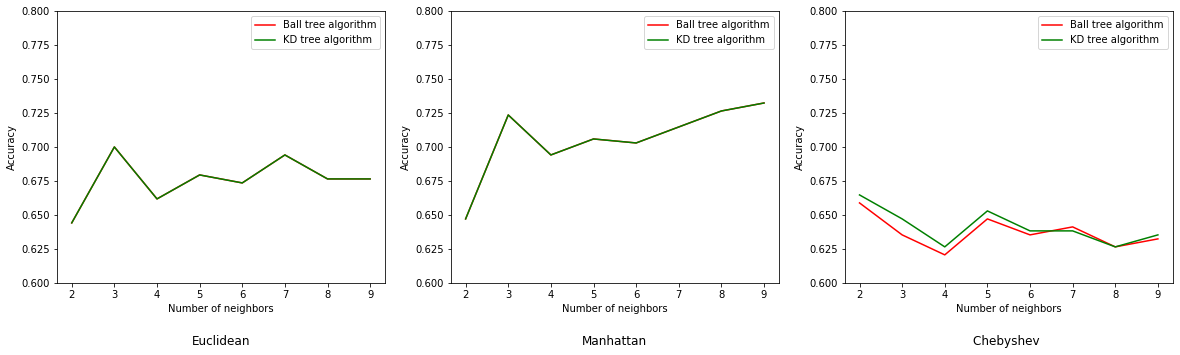

In [60]:
#Identity graph
steps = np.arange(2,10,1)


plt.figure(figsize=(20,5))
subplot(1,3,1)
plt.plot(steps, final_accuracyList[0:8], color='red', label='Ball tree algorithm')
plt.plot(steps, final_accuracyList[8:16], color='green', label='KD tree algorithm')
plt.ylim(0.60,0.80,0.01)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Euclidean', y=-0.25)

subplot(1,3,2)
plt.plot(steps, final_accuracyList[16:24], color='red', label='Ball tree algorithm')
plt.plot(steps, final_accuracyList[24:32], color='green', label='KD tree algorithm')
plt.ylim(0.60,0.80,0.01)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Manhattan', y=-0.25)

subplot(1,3,3)
plt.plot(steps, final_accuracyList[32:40], color='red', label='Ball tree algorithm')
plt.plot(steps, final_accuracyList[40:48], color='green', label='KD tree algorithm')
plt.ylim(0.60,0.80,0.01)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Chebyshev ', y=-0.25)


plt.show()

# Part 3(i) - Chart for train data size vs Accuracy

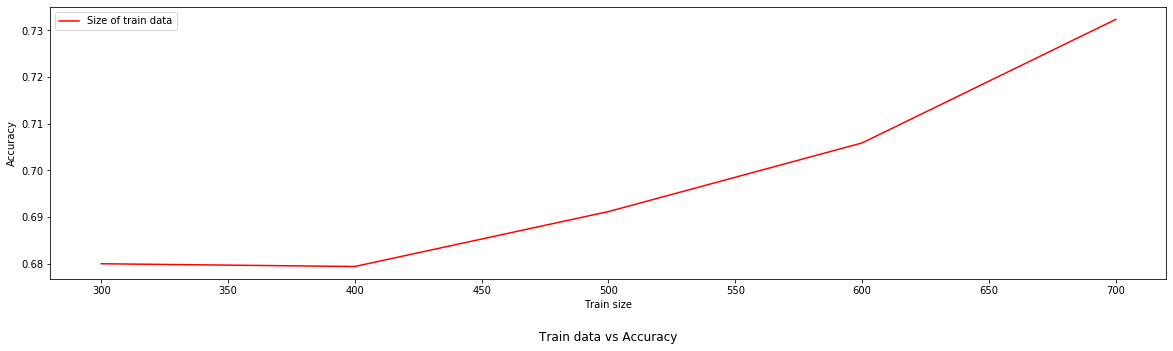

In [61]:
neigh = KNeighborsClassifier(metric='manhattan',algorithm  = 'ball_tree',n_neighbors=3)
rangeValues = [300,400,500,600,700]
accuracy_train_size = []
for i in range(0,len(rangeValues)):
    neigh.fit(X_Train[0:rangeValues[i]], Y_Train[0:rangeValues[i]])
    predicted_classes = neigh.predict(X_Test[0:rangeValues[i]])
    accuracyValue = accuracy_score(Y_Test[0:rangeValues[i]],predicted_classes)
    accuracy_train_size.append(accuracyValue)
#graph
plt.figure(figsize=(20,5))
subplot(1,1,1)
plt.plot(rangeValues, accuracy_train_size, color='red', label='Size of train data')

plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train data vs Accuracy', y=-0.25)

plt.show()

# Part 3(ii) - Cross validation

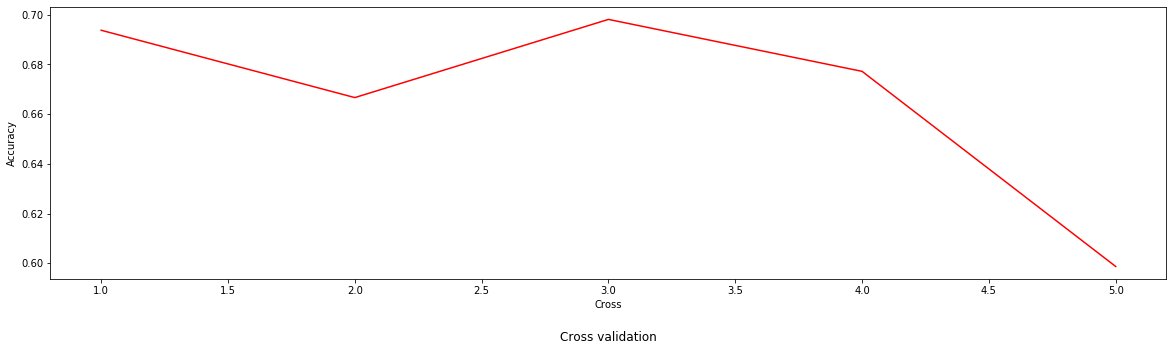

In [62]:
neigh = KNeighborsClassifier(metric='manhattan',algorithm  = 'ball_tree',n_neighbors=3)
neigh.fit(X_Train, Y_Train)
score = cross_val_score(neigh,X_Train,Y_Train, cv=5,scoring='accuracy')
steps = [1,2,3,4,5]
#graph
plt.figure(figsize=(20,5))
subplot(1,1,1)
plt.plot(steps, score, color='red')

plt.xlabel('Cross')
plt.ylabel('Accuracy')
plt.title('Cross validation', y=-0.25)

plt.show()

# Part 4(i) Confusion Matrix

In [63]:
neigh = KNeighborsClassifier(metric='manhattan',
                                         algorithm  = 'ball_tree',
                                         n_neighbors=3
                                         )
neigh.fit(X_Train, Y_Train)
predicted_classes = neigh.predict(X_Test)

cm = confusion_matrix(Y_Test, predicted_classes)
cm

array([[134,  37,   6],
       [ 40,  97,   2],
       [  6,   3,  15]], dtype=int64)

# Part 4(ii) Other parameters

In [64]:
print("Accuracy", (cm[1][1] + cm[0][0]) / np.sum(cm) )
print("Sensitivity", cm[1][1] / (cm[1][1] + cm[1][0] ))
print("Specificity", cm[0][0] / (cm[0][0] + cm[0][1] ))
print("Precision", cm[1][1] / (cm[1][1] + cm[0][1] ))

Accuracy 0.6794117647058824
Sensitivity 0.708029197080292
Specificity 0.783625730994152
Precision 0.7238805970149254


# Neural Networks

# Part 1(i) : Training set - Activation Functions, Number of nodes, Hidden layers - 1 hidden layers and respective units in the hidden layer

In [65]:
#Parametrs to change for experiment
max_iterations_list = [1000,2000,3000]
number_of_iterations = len(max_iterations_list)

activationFunctions = ['identity', 'logistic', 'tanh', 'relu']
numberOfActivationFunction = len(activationFunctions)

hidden_layer_values = [1,2,3,4,5]
numberOfHiddenLayers = len(hidden_layer_values)

#FinalValueToStore
finalActivationList = []
finalHiddenLayerList = []
finalAccuracyList = []

count = 0

for h in range(0,number_of_iterations):
    for i in range(0,numberOfActivationFunction):
        for j in range(0,numberOfHiddenLayers):
            clf = MLPClassifier(activation = activationFunctions[i],
                            hidden_layer_sizes=(hidden_layer_values[j],),
                                                    random_state=1,max_iter = max_iterations_list[h])
            clf.fit(X_Train, Y_Train) 
            predicted_classes = clf.predict(X_Train)
            accuracyValue = accuracy_score(Y_Train,predicted_classes)
        
            finalActivationList.append(activationFunctions[i])
            finalHiddenLayerList.append(hidden_layer_values[j])
        
            finalAccuracyList.append(accuracyValue)
            count = count + 1
            print("Step : ",count, "/",(numberOfActivationFunction * numberOfHiddenLayers * number_of_iterations))

c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  1 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  2 / 60
Step :  3 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  4 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  5 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  6 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  7 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  8 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  9 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  10 / 60
Step :  11 / 60
Step :  12 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  13 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  14 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  15 / 60
Step :  16 / 60
Step :  17 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  18 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  19 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  20 / 60
Step :  21 / 60
Step :  22 / 60
Step :  23 / 60
Step :  24 / 60
Step :  25 / 60
Step :  26 / 60
Step :  27 / 60
Step :  28 / 60
Step :  29 / 60
Step :  30 / 60
Step :  31 / 60
Step :  32 / 60
Step :  33 / 60
Step :  34 / 60
Step :  35 / 60
Step :  36 / 60
Step :  37 / 60
Step :  38 / 60
Step :  39 / 60
Step :  40 / 60
Step :  41 / 60
Step :  42 / 60
Step :  43 / 60
Step :  44 / 60
Step :  45 / 60
Step :  46 / 60
Step :  47 / 60
Step :  48 / 60
Step :  49 / 60
Step :  50 / 60
Step :  51 / 60
Step :  52 / 60
Step :  53 / 60
Step :  54 / 60
Step :  55 / 60
Step :  56 / 60
Step :  57 / 60
Step :  58 / 60
Step :  59 / 60
Step :  60 / 60


# Part 1(ii) : Training set - Activation Functions, Number of nodes, Hidden layers - 1 hidden layers and respective units in the hidden layer - Plot

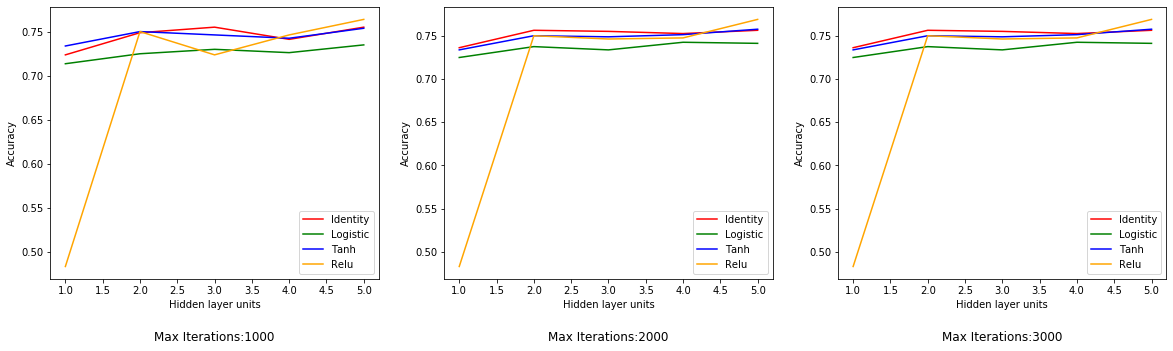

In [66]:
hidden_layer_values = [1,2,3,4,5]
plt.figure(figsize=(20,5))
subplot(1,3,1)

plt.plot(hidden_layer_values, finalAccuracyList[0:5], color='red', label='Identity')
plt.plot(hidden_layer_values, finalAccuracyList[5:10], color='green', label='Logistic')
plt.plot(hidden_layer_values, finalAccuracyList[10:15], color='blue', label='Tanh')
plt.plot(hidden_layer_values, finalAccuracyList[15:20], color='orange', label='Relu')
plt.xlabel('Hidden layer units')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Max Iterations:1000', y=-0.25)

subplot(1,3,2)
plt.plot(hidden_layer_values, finalAccuracyList[20:25], color='red', label='Identity')
plt.plot(hidden_layer_values, finalAccuracyList[25:30], color='green', label='Logistic')
plt.plot(hidden_layer_values, finalAccuracyList[30:35], color='blue', label='Tanh')
plt.plot(hidden_layer_values, finalAccuracyList[35:40], color='orange', label='Relu')
plt.xlabel('Hidden layer units')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Max Iterations:2000', y=-0.25)

subplot(1,3,3)
plt.plot(hidden_layer_values, finalAccuracyList[40:45], color='red', label='Identity')
plt.plot(hidden_layer_values, finalAccuracyList[45:50], color='green', label='Logistic')
plt.plot(hidden_layer_values, finalAccuracyList[50:55], color='blue', label='Tanh')
plt.plot(hidden_layer_values, finalAccuracyList[55:60], color='orange', label='Relu')
plt.xlabel('Hidden layer units')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Max Iterations:3000', y=-0.25)


plt.show()

# Part 1(iii) : Validation set - Activation Functions, Number of nodes, Hidden layers - 1 hidden layers and respective units in the hidden layer

In [67]:
#Parametrs to change for experiment
max_iterations_list = [1000,2000,3000]
number_of_iterations = len(max_iterations_list)

activationFunctions = ['identity', 'logistic', 'tanh', 'relu']
numberOfActivationFunction = len(activationFunctions)

hidden_layer_values = [1,2,3,4,5]
numberOfHiddenLayers = len(hidden_layer_values)

#FinalValueToStore
finalActivationList = []
finalHiddenLayerList = []
finalAccuracyList = []

count = 0

for h in range(0,number_of_iterations):
    for i in range(0,numberOfActivationFunction):
        for j in range(0,numberOfHiddenLayers):
            clf = MLPClassifier(activation = activationFunctions[i],
                            hidden_layer_sizes=(hidden_layer_values[j],),
                                                    random_state=1,max_iter = max_iterations_list[h])
            clf.fit(X_Train, Y_Train) 
            predicted_classes = clf.predict(X_Test)
            accuracyValue = accuracy_score(Y_Test,predicted_classes)
        
            finalActivationList.append(activationFunctions[i])
            finalHiddenLayerList.append(hidden_layer_values[j])
        
            finalAccuracyList.append(accuracyValue)
            count = count + 1
            print("Step : ",count, "/",(numberOfActivationFunction * numberOfHiddenLayers * number_of_iterations))

c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  1 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  2 / 60
Step :  3 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  4 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  5 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  6 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  7 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  8 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  9 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  10 / 60
Step :  11 / 60
Step :  12 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  13 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  14 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  15 / 60
Step :  16 / 60
Step :  17 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  18 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  19 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  20 / 60
Step :  21 / 60
Step :  22 / 60
Step :  23 / 60
Step :  24 / 60
Step :  25 / 60
Step :  26 / 60
Step :  27 / 60
Step :  28 / 60
Step :  29 / 60
Step :  30 / 60
Step :  31 / 60
Step :  32 / 60
Step :  33 / 60
Step :  34 / 60
Step :  35 / 60
Step :  36 / 60
Step :  37 / 60
Step :  38 / 60
Step :  39 / 60
Step :  40 / 60
Step :  41 / 60
Step :  42 / 60
Step :  43 / 60
Step :  44 / 60
Step :  45 / 60
Step :  46 / 60
Step :  47 / 60
Step :  48 / 60
Step :  49 / 60
Step :  50 / 60
Step :  51 / 60
Step :  52 / 60
Step :  53 / 60
Step :  54 / 60
Step :  55 / 60
Step :  56 / 60
Step :  57 / 60
Step :  58 / 60
Step :  59 / 60
Step :  60 / 60


# Part 1(iv) : Validation set - Activation Functions, Number of nodes, Hidden layers - 1 hidden layers and respective units in the hidden layer - Plot

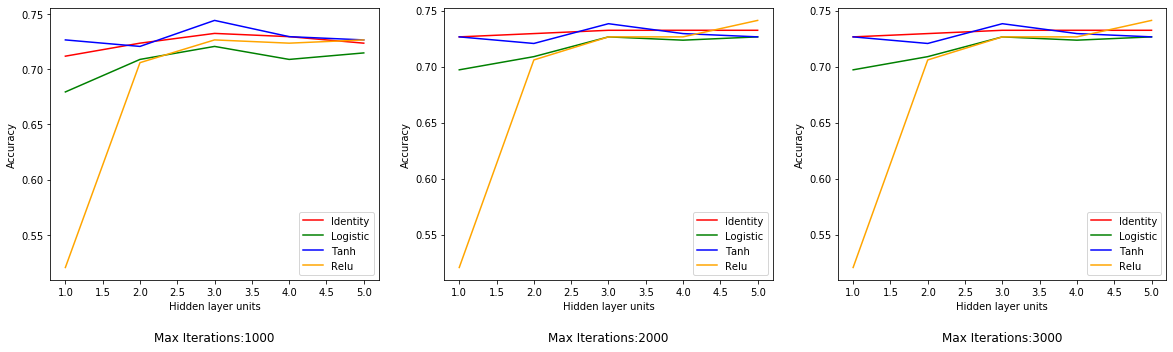

In [68]:
hidden_layer_values = [1,2,3,4,5]
plt.figure(figsize=(20,5))
subplot(1,3,1)

plt.plot(hidden_layer_values, finalAccuracyList[0:5], color='red', label='Identity')
plt.plot(hidden_layer_values, finalAccuracyList[5:10], color='green', label='Logistic')
plt.plot(hidden_layer_values, finalAccuracyList[10:15], color='blue', label='Tanh')
plt.plot(hidden_layer_values, finalAccuracyList[15:20], color='orange', label='Relu')
plt.xlabel('Hidden layer units')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Max Iterations:1000', y=-0.25)

subplot(1,3,2)
plt.plot(hidden_layer_values, finalAccuracyList[20:25], color='red', label='Identity')
plt.plot(hidden_layer_values, finalAccuracyList[25:30], color='green', label='Logistic')
plt.plot(hidden_layer_values, finalAccuracyList[30:35], color='blue', label='Tanh')
plt.plot(hidden_layer_values, finalAccuracyList[35:40], color='orange', label='Relu')
plt.xlabel('Hidden layer units')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Max Iterations:2000', y=-0.25)

subplot(1,3,3)
plt.plot(hidden_layer_values, finalAccuracyList[40:45], color='red', label='Identity')
plt.plot(hidden_layer_values, finalAccuracyList[45:50], color='green', label='Logistic')
plt.plot(hidden_layer_values, finalAccuracyList[50:55], color='blue', label='Tanh')
plt.plot(hidden_layer_values, finalAccuracyList[55:60], color='orange', label='Relu')
plt.xlabel('Hidden layer units')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Max Iterations:3000', y=-0.25)


plt.show()

# Part 2(i) : Training set - Activation Functions, Number of nodes, Hidden layers - 2 hidden layers and respective units in the hidden layer

In [69]:
#Parametrs to change for experiment
max_iterations_list = [1000,2000,3000]
number_of_iterations = len(max_iterations_list)

activationFunctions = ['identity', 'logistic', 'tanh', 'relu']
numberOfActivationFunction = len(activationFunctions)

hidden_layer_values = [3,4,5,6,7]
numberOfHiddenLayers = len(hidden_layer_values)

#FinalValueToStore
finalActivationList = []
finalHiddenLayerList = []
finalAccuracyList = []

count = 0

for h in range(0,number_of_iterations):
    for i in range(0,numberOfActivationFunction):
        for j in range(0,numberOfHiddenLayers):
            clf = MLPClassifier(activation = activationFunctions[i],
                            hidden_layer_sizes=(hidden_layer_values[j],3),
                                                    random_state=1,max_iter = max_iterations_list[h])
            clf.fit(X_Train, Y_Train) 
            predicted_classes = clf.predict(X_Train)
            accuracyValue = accuracy_score(Y_Train,predicted_classes)
        
            finalActivationList.append(activationFunctions[i])
            finalHiddenLayerList.append(hidden_layer_values[j])
        
            finalAccuracyList.append(accuracyValue)
            count = count + 1
            print("Step : ",count, "/",(numberOfActivationFunction * numberOfHiddenLayers * number_of_iterations))

c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  1 / 60
Step :  2 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  3 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  4 / 60
Step :  5 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  6 / 60
Step :  7 / 60
Step :  8 / 60
Step :  9 / 60
Step :  10 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  11 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  12 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  13 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  14 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  15 / 60
Step :  16 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  17 / 60
Step :  18 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  19 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  20 / 60
Step :  21 / 60
Step :  22 / 60
Step :  23 / 60
Step :  24 / 60
Step :  25 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  26 / 60
Step :  27 / 60
Step :  28 / 60
Step :  29 / 60
Step :  30 / 60
Step :  31 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  32 / 60
Step :  33 / 60
Step :  34 / 60
Step :  35 / 60
Step :  36 / 60
Step :  37 / 60
Step :  38 / 60
Step :  39 / 60
Step :  40 / 60
Step :  41 / 60
Step :  42 / 60
Step :  43 / 60
Step :  44 / 60
Step :  45 / 60
Step :  46 / 60
Step :  47 / 60
Step :  48 / 60
Step :  49 / 60
Step :  50 / 60
Step :  51 / 60
Step :  52 / 60
Step :  53 / 60
Step :  54 / 60
Step :  55 / 60
Step :  56 / 60
Step :  57 / 60
Step :  58 / 60
Step :  59 / 60
Step :  60 / 60


# Part 2(ii) : Training set - Activation Functions, Number of nodes, Hidden layers - 2 hidden layers and respective units in the hidden layer - Plot

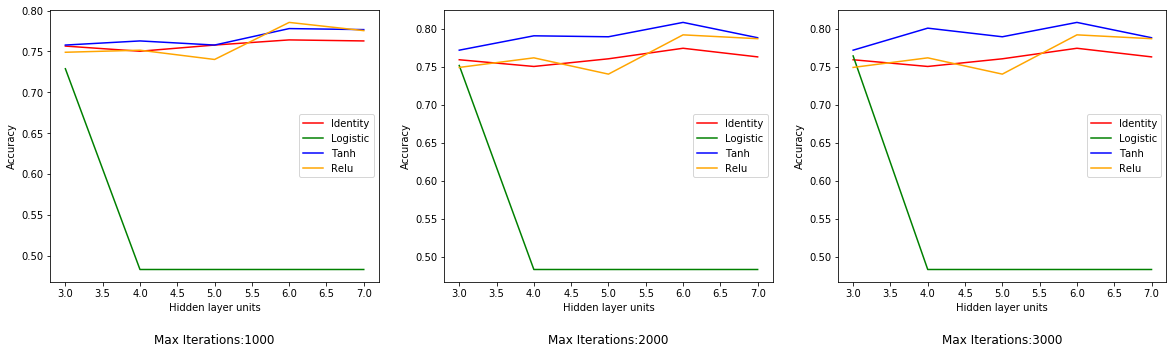

In [70]:
hidden_layer_values = [3,4,5,6,7]
plt.figure(figsize=(20,5))
subplot(1,3,1)

plt.plot(hidden_layer_values, finalAccuracyList[0:5], color='red', label='Identity')
plt.plot(hidden_layer_values, finalAccuracyList[5:10], color='green', label='Logistic')
plt.plot(hidden_layer_values, finalAccuracyList[10:15], color='blue', label='Tanh')
plt.plot(hidden_layer_values, finalAccuracyList[15:20], color='orange', label='Relu')
plt.xlabel('Hidden layer units')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Max Iterations:1000', y=-0.25)

subplot(1,3,2)
plt.plot(hidden_layer_values, finalAccuracyList[20:25], color='red', label='Identity')
plt.plot(hidden_layer_values, finalAccuracyList[25:30], color='green', label='Logistic')
plt.plot(hidden_layer_values, finalAccuracyList[30:35], color='blue', label='Tanh')
plt.plot(hidden_layer_values, finalAccuracyList[35:40], color='orange', label='Relu')
plt.xlabel('Hidden layer units')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Max Iterations:2000', y=-0.25)

subplot(1,3,3)
plt.plot(hidden_layer_values, finalAccuracyList[40:45], color='red', label='Identity')
plt.plot(hidden_layer_values, finalAccuracyList[45:50], color='green', label='Logistic')
plt.plot(hidden_layer_values, finalAccuracyList[50:55], color='blue', label='Tanh')
plt.plot(hidden_layer_values, finalAccuracyList[55:60], color='orange', label='Relu')
plt.xlabel('Hidden layer units')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Max Iterations:3000', y=-0.25)


plt.show()

# Part 2(iii) : Validation set - Activation Functions, Number of nodes, Hidden layers - 2 hidden layers and respective units in the hidden layer

In [71]:
#Parametrs to change for experiment
max_iterations_list = [1000,2000,3000]
number_of_iterations = len(max_iterations_list)

activationFunctions = ['identity', 'logistic', 'tanh', 'relu']
numberOfActivationFunction = len(activationFunctions)

hidden_layer_values = [3,4,5,6,7]
numberOfHiddenLayers = len(hidden_layer_values)

#FinalValueToStore
finalActivationList = []
finalHiddenLayerList = []
finalAccuracyList = []

count = 0

for h in range(0,number_of_iterations):
    for i in range(0,numberOfActivationFunction):
        for j in range(0,numberOfHiddenLayers):
            clf = MLPClassifier(activation = activationFunctions[i],
                            hidden_layer_sizes=(hidden_layer_values[j],3),
                                                    random_state=1,max_iter = max_iterations_list[h])
            clf.fit(X_Train, Y_Train) 
            predicted_classes = clf.predict(X_Test)
            accuracyValue = accuracy_score(Y_Test,predicted_classes)
        
            finalActivationList.append(activationFunctions[i])
            finalHiddenLayerList.append(hidden_layer_values[j])
        
            finalAccuracyList.append(accuracyValue)
            count = count + 1
            print("Step : ",count, "/",(numberOfActivationFunction * numberOfHiddenLayers * number_of_iterations))

c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  1 / 60
Step :  2 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  3 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  4 / 60
Step :  5 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  6 / 60
Step :  7 / 60
Step :  8 / 60
Step :  9 / 60
Step :  10 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  11 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  12 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  13 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  14 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  15 / 60
Step :  16 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  17 / 60
Step :  18 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  19 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  20 / 60
Step :  21 / 60
Step :  22 / 60
Step :  23 / 60
Step :  24 / 60
Step :  25 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  26 / 60
Step :  27 / 60
Step :  28 / 60
Step :  29 / 60
Step :  30 / 60
Step :  31 / 60


c:\users\siddharth\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Step :  32 / 60
Step :  33 / 60
Step :  34 / 60
Step :  35 / 60
Step :  36 / 60
Step :  37 / 60
Step :  38 / 60
Step :  39 / 60
Step :  40 / 60
Step :  41 / 60
Step :  42 / 60
Step :  43 / 60
Step :  44 / 60
Step :  45 / 60
Step :  46 / 60
Step :  47 / 60
Step :  48 / 60
Step :  49 / 60
Step :  50 / 60
Step :  51 / 60
Step :  52 / 60
Step :  53 / 60
Step :  54 / 60
Step :  55 / 60
Step :  56 / 60
Step :  57 / 60
Step :  58 / 60
Step :  59 / 60
Step :  60 / 60


# Part 2(iv) : Validation set - Activation Functions, Number of nodes, Hidden layers - 2 hidden layers and respective units in the hidden layer - Plot

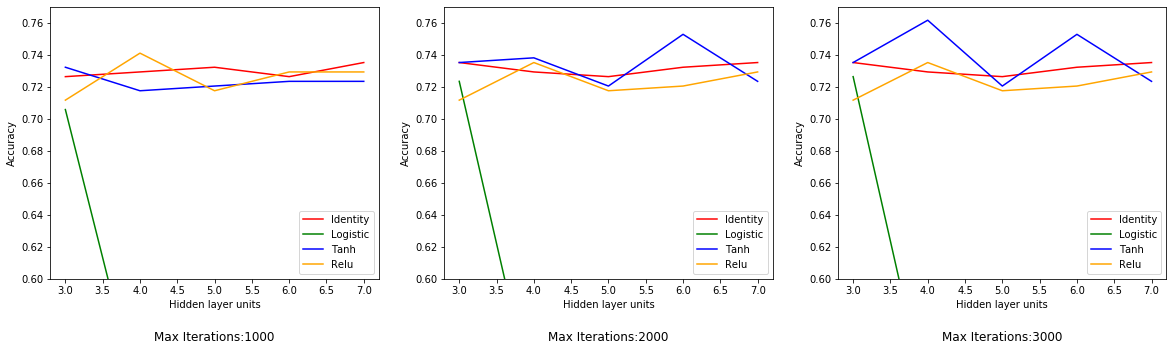

In [72]:
hidden_layer_values = [3,4,5,6,7]
plt.figure(figsize=(20,5))
subplot(1,3,1)

plt.plot(hidden_layer_values, finalAccuracyList[0:5], color='red', label='Identity')
plt.plot(hidden_layer_values, finalAccuracyList[5:10], color='green', label='Logistic')
plt.plot(hidden_layer_values, finalAccuracyList[10:15], color='blue', label='Tanh')
plt.plot(hidden_layer_values, finalAccuracyList[15:20], color='orange', label='Relu')
plt.xlabel('Hidden layer units')
plt.ylabel('Accuracy')
plt.ylim(0.60,0.77)
plt.legend()
plt.title('Max Iterations:1000', y=-0.25)

subplot(1,3,2)
plt.plot(hidden_layer_values, finalAccuracyList[20:25], color='red', label='Identity')
plt.plot(hidden_layer_values, finalAccuracyList[25:30], color='green', label='Logistic')
plt.plot(hidden_layer_values, finalAccuracyList[30:35], color='blue', label='Tanh')
plt.plot(hidden_layer_values, finalAccuracyList[35:40], color='orange', label='Relu')
plt.xlabel('Hidden layer units')
plt.ylabel('Accuracy')
plt.ylim(0.60,0.77)
plt.legend()
plt.title('Max Iterations:2000', y=-0.25)

subplot(1,3,3)
plt.plot(hidden_layer_values, finalAccuracyList[40:45], color='red', label='Identity')
plt.plot(hidden_layer_values, finalAccuracyList[45:50], color='green', label='Logistic')
plt.plot(hidden_layer_values, finalAccuracyList[50:55], color='blue', label='Tanh')
plt.plot(hidden_layer_values, finalAccuracyList[55:60], color='orange', label='Relu')
plt.xlabel('Hidden layer units')
plt.ylabel('Accuracy')
plt.ylim(0.60,0.77)
plt.legend()
plt.title('Max Iterations:3000', y=-0.25)


plt.show()

# Part 3(i) - Chart for train data size vs Accuracy

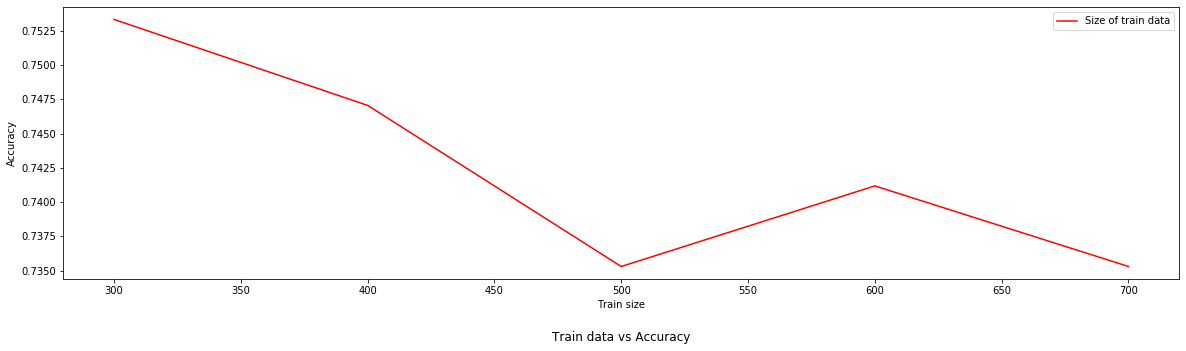

In [73]:
clf = MLPClassifier(activation = 'tanh',
                            hidden_layer_sizes=(4,3), random_state=1,max_iter = 3000)
rangeValues = [300,400,500,600,700]
accuracy_train_size = []
for i in range(0,len(rangeValues)):
    clf.fit(X_Train[0:rangeValues[i]], Y_Train[0:rangeValues[i]])
    predicted_classes = clf.predict(X_Test[0:rangeValues[i]])
    accuracyValue = accuracy_score(Y_Test[0:rangeValues[i]],predicted_classes)
    accuracy_train_size.append(accuracyValue)

#graph
plt.figure(figsize=(20,5))
subplot(1,1,1)
plt.plot(rangeValues, accuracy_train_size, color='red', label='Size of train data')

plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train data vs Accuracy', y=-0.25)

plt.show()

# Part 3(ii) - Cross validation

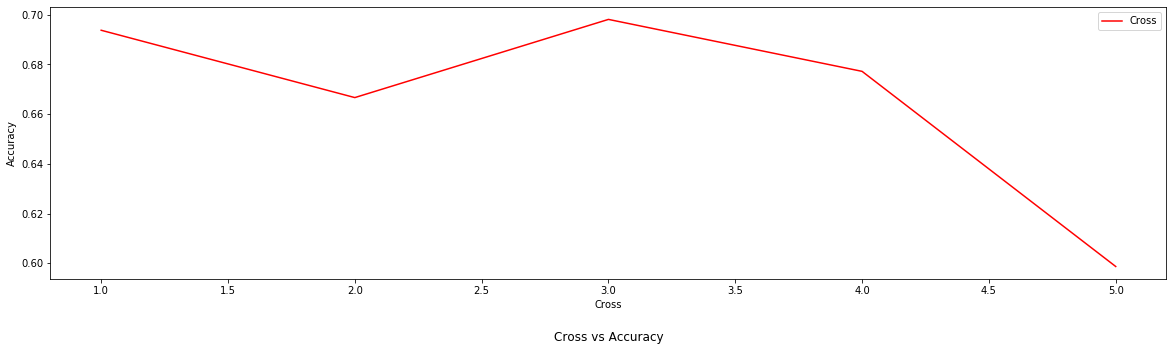

In [74]:
clf = MLPClassifier(activation = 'tanh',
                            hidden_layer_sizes=(4,3), random_state=1,max_iter = 3000)
clf.fit(X_Train, Y_Train)
score = cross_val_score(neigh,X_Train,Y_Train, cv=5,scoring='accuracy')
steps = [1,2,3,4,5]
#graph
plt.figure(figsize=(20,5))
subplot(1,1,1)
plt.plot(steps, score, color='red', label='Cross')

plt.xlabel('Cross')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Cross vs Accuracy', y=-0.25)

plt.show()

# Part 4(i) Confusion Matrix

In [77]:
clf = MLPClassifier(activation = 'tanh',
                            hidden_layer_sizes=(4,3), random_state=1,max_iter = 3000)
clf.fit(X_Train, Y_Train)
predicted_classes = clf.predict(X_Test)

cm = confusion_matrix(Y_Test, predicted_classes)
cm


array([[129,  36,  12],
       [ 20, 113,   6],
       [  7,   0,  17]], dtype=int64)

# Part 4(ii) Other parameters

In [78]:
print("Accuracy", (cm[1][1] + cm[0][0]) / np.sum(cm) )
print("Sensitivity", cm[1][1] / (cm[1][1] + cm[1][0] ))
print("Specificity", cm[0][0] / (cm[0][0] + cm[0][1] ))
print("Precision", cm[1][1] / (cm[1][1] + cm[0][1] ))

Accuracy 0.711764705882353
Sensitivity 0.849624060150376
Specificity 0.7818181818181819
Precision 0.7583892617449665
